In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("important.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

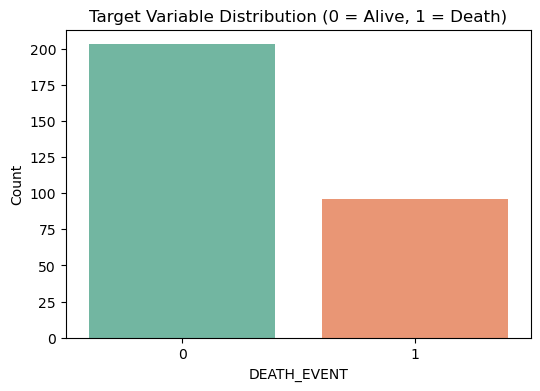

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df, palette='Set2')
plt.title('Target Variable Distribution (0 = Alive, 1 = Death)')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.show()

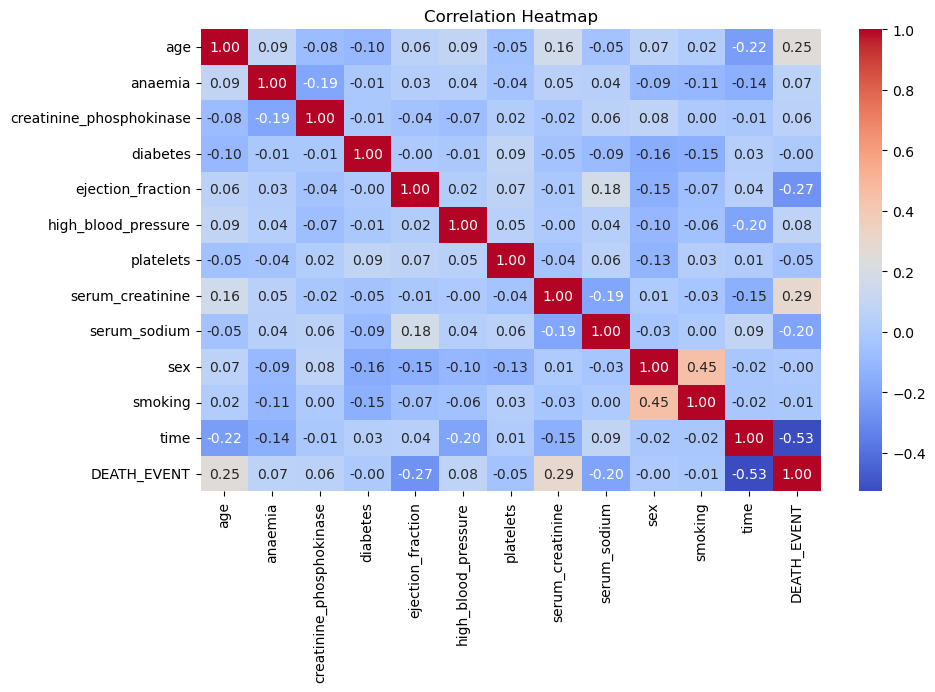

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

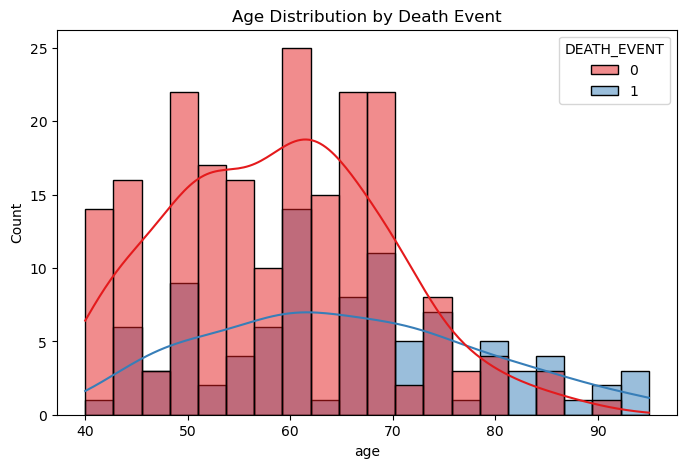

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="age", hue="DEATH_EVENT", kde=True, palette="Set1", bins=20)
plt.title("Age Distribution by Death Event")
plt.show()

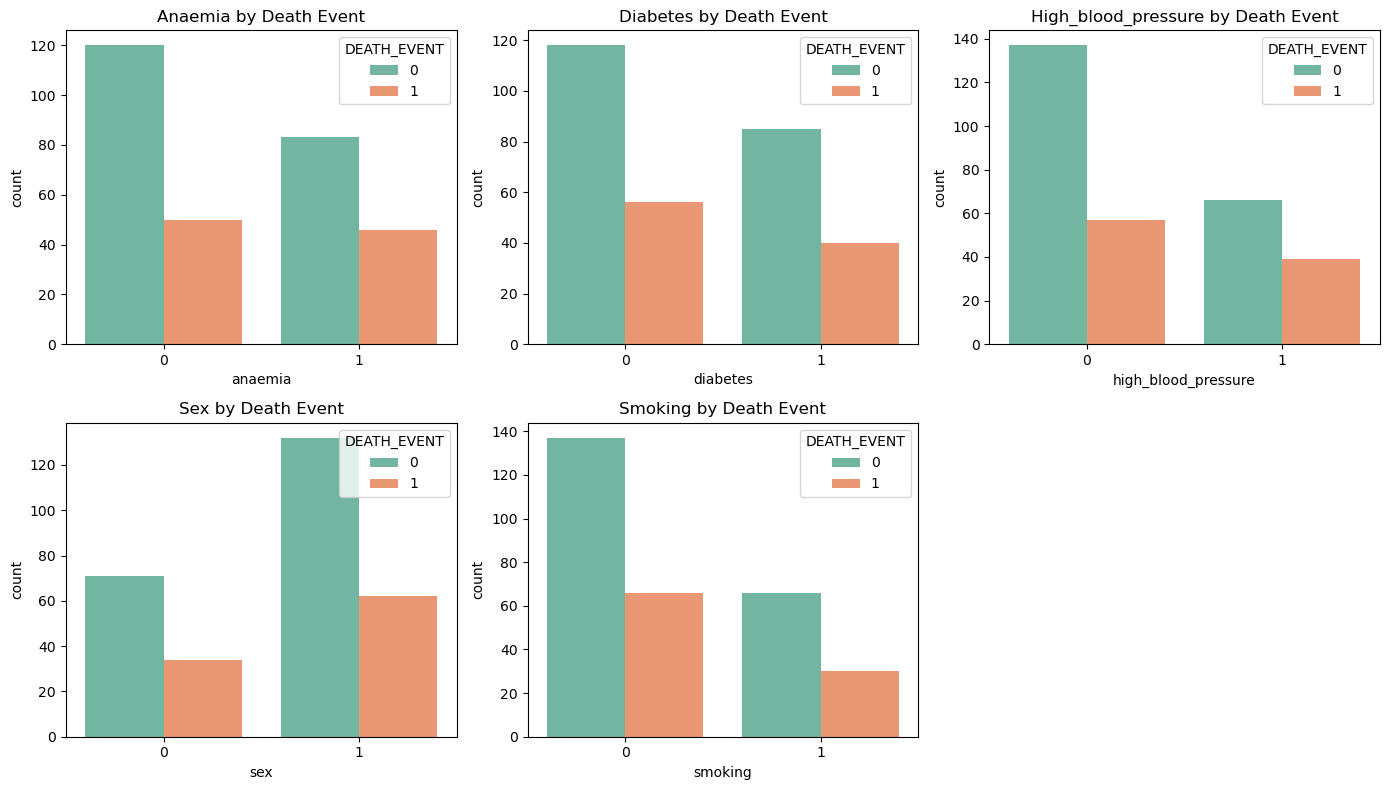

In [10]:
# Countplots for Binary Categorical Columns
binary_cols = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

plt.figure(figsize=(14, 8))
for i, col in enumerate(binary_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue="DEATH_EVENT", data=df, palette="Set2")
    plt.title(f'{col.capitalize()} by Death Event')
    plt.legend(title="DEATH_EVENT", loc="upper right")

plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

In [12]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
lr_model = LogisticRegression()

In [16]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
lr_pred = lr_model.predict(X_test_scaled)

In [18]:
# Logistic Regression
print("Accuracy:", accuracy_score(y_test, lr_pred))

Accuracy: 0.8


In [19]:
print("Precision:", precision_score(y_test, lr_pred))

Precision: 0.9333333333333333


In [20]:
print("Recall:", recall_score(y_test, lr_pred))

Recall: 0.56


In [21]:
print("F1 Score:", f1_score(y_test, lr_pred))


F1 Score: 0.7


In [22]:
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))


Confusion Matrix:
 [[34  1]
 [11 14]]


In [23]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

In [24]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
rf_pred = rf_model.predict(X_test)

In [26]:
# Random Forest:
print("Accuracy:", accuracy_score(y_test, rf_pred))

Accuracy: 0.75


In [27]:
print("Precision:", precision_score(y_test, rf_pred))

Precision: 0.8571428571428571


In [28]:
print("Recall:", recall_score(y_test, rf_pred))

Recall: 0.48


In [29]:
print("F1 Score:", f1_score(y_test, rf_pred))

F1 Score: 0.6153846153846154


In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Confusion Matrix:
 [[33  2]
 [13 12]]


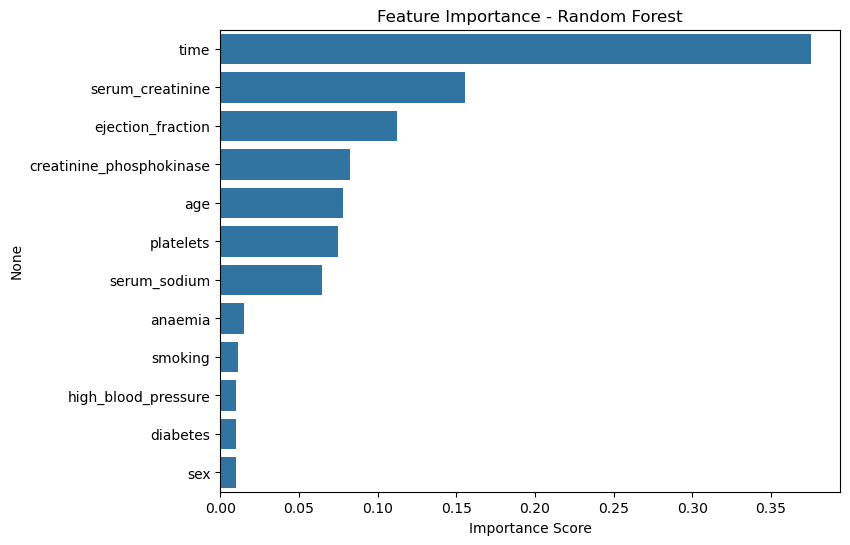

In [31]:
# Feature Importance Plot (Random Forest)
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

In [32]:
# Save Best Model (Logistic Regression)
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

In [33]:
# Save Scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [34]:
# Load model and scaler
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

In [35]:

# Ask for user input
print("Enter patient health data:")

inputs = [
    float(input("Age: ")),
    int(input("Anaemia (0/1): ")),
    float(input("Creatinine Phosphokinase: ")),
    int(input("Diabetes (0/1): ")),
    float(input("Ejection Fraction: ")),
    int(input("High Blood Pressure (0/1): ")),
    float(input("Platelets: ")),
    float(input("Serum Creatinine: ")),
    int(input("Serum Sodium: ")),
    int(input("Sex (0 = Female, 1 = Male): ")),
    int(input("Smoking (0/1): ")),
    int(input("Follow-up Time (in days): "))
]


Enter patient health data:


Age:  65
Anaemia (0/1):  1
Creatinine Phosphokinase:  582
Diabetes (0/1):  0
Ejection Fraction:  38
High Blood Pressure (0/1):  1
Platelets:  265000
Serum Creatinine:  1.9
Serum Sodium:  137
Sex (0 = Female, 1 = Male):  1
Smoking (0/1):  0
Follow-up Time (in days):  130


In [36]:
# Preprocess input
input_array = np.array(inputs).reshape(1, -1)
scaled_input = scaler.transform(input_array)

In [37]:

# Predict
prediction = model.predict(scaled_input)[0]

In [38]:
# Result
result = "⚠️ High Risk of Heart Failure" if prediction == 1 else "✅ Low Risk (Safe)"
print(f"\nPrediction: {result}")



Prediction: ✅ Low Risk (Safe)
